In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import numpy as np

In [6]:
np.logical_or([1],[0])

array([ True])

In [10]:
def preprocess(path):
    raw = np.array(Image.open(path))
    raw = raw[:,:,0:3]
    hsv = matplotlib.colors.rgb_to_hsv(raw)

    mask = np.logical_and(hsv[:,:,0]>0.4 , hsv[:,:,0]<0.8)#Mask all blue hues
    mask = np.logical_or(hsv[:,:,2]<100,mask)#Mask out values that are not bright engough
    
    #Use binary hit and miss to remove potentially remaining isolated pixels:
    m = np.logical_not(mask)
    change = 1
    while(change > 0):
        a = binary_hit_or_miss(m, [[ 0, -1,  0]]) + binary_hit_or_miss(m, np.array([[ 0, -1,  0]]).T)
        m[a] = False
        change = 1
        plt.imshow(a)
    
    mask = np.logical_not(m)
    raw[:,:,0][mask] = 0
    raw[:,:,1][mask] = 0
    raw[:,:,2][mask] = 0
    return raw


In [11]:
from scipy.ndimage.morphology import binary_hit_or_miss

In [ ]:
mask = preprocess(os.getcwd()+"/npurp1.png")

KeyboardInterrupt: 

In [ ]:
plt.imshow(mask)

In [291]:
m = np.logical_not(mask)


In [ ]:
m = np.logical_not(mask)
change = 1
while(change > 0):
    a = binary_hit_or_miss(m, [[ 0, -1,  0]]) + binary_hit_or_miss(m, np.array([[ 0, -1,  0]]).T)
    m[a] = False
    change = np.sum(a)
    print(change)

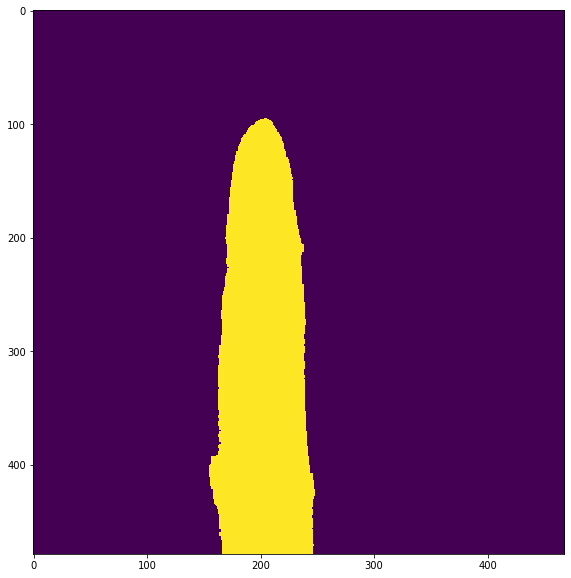

In [293]:
fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(m)

In [ ]:
delete1 = np.asarray([[1,1]])
keep1 = np.asarray([[0,1,0]])#True for single pixels
delete2 = np.asarray([[1],
                      [1]])
keep2 = np.asarray([[0],
                    [1],
                    [0]])

delete3 = np.asarray([[0,1],
                      [1,0]])
delete4 = np.asarray([[1,0],
                      [0,1]])


for img_id in range(imgs.shape[0]):
    for x in range(iterations):#Erode and keep one pixel
        imgs[img_id] = binary_hit_or_miss(imgs[img_id],delete1) + binary_hit_or_miss(imgs[img_id],keep1)
        imgs[img_id] = binary_hit_or_miss(imgs[img_id],delete2) + binary_hit_or_miss(imgs[img_id],keep2)
        imgs[img_id] = np.asarray(imgs[img_id],dtype=np.int32) - np.asarray(binary_hit_or_miss(imgs[img_id],delete3),dtype=np.int32) #Find pattern and delete pixel
        imgs[img_id] = np.asarray(imgs[img_id],dtype=np.int32) - np.asarray(binary_hit_or_miss(imgs[img_id],delete4),dtype=np.int32) #Find pattern and delete pixel
return imgs

In [3]:
#fig,ax = plt.subplots(1,figsize=(15,15))
# ax.imshow(preprocess(os.getcwd()+"/npurp1.png"))
#fig,ax = plt.subplots(1,figsize=(15,15))
#ax.imshow(preprocess(os.getcwd()+"/purp.png"))

In [4]:
purple = preprocess(os.getcwd()+"/npurp1.png")#np.array(Image.open(os.getcwd()+"/example_heads_purple.png"))
white = preprocess(os.getcwd()+"/npurp1.png")#np.array(Image.open(os.getcwd()+"/example_heads_white.png"))


NameError: name 'preprocess' is not defined

In [328]:
purple=purple[:,:,0:3]
white=white[:,:,0:3]

In [329]:
max_bright = 255

In [330]:
hue_purple = matplotlib.colors.rgb_to_hsv(purple)[:,:,0]
sat_purple = matplotlib.colors.rgb_to_hsv(purple)[:,:,1]
mask_purple = ~np.logical_and(np.logical_and(purple[:,:,0]==0, purple[:,:,1]==0),purple[:,:,2]==0)
mask_purple = np.logical_and(mask_purple,sat_purple>0.3)

In [331]:
hue_white = matplotlib.colors.rgb_to_hsv(white)[:,:,0]
sat_white = matplotlib.colors.rgb_to_hsv(white)[:,:,1]
mask_white = ~np.logical_and(np.logical_and(white[:,:,0]==0, white[:,:,1]==0),white[:,:,2]==0)
mask_white = np.logical_and(mask_white,sat_white>0.3)

In [ ]:
hue = matplotlib.colors.rgb_to_hsv(img)[:,:,0]
sat = matplotlib.colors.rgb_to_hsv(img)[:,:,1]

In [4]:
bins = np.linspace(0,1,100)

hist_hue_purple = np.histogram(hue_purple[mask_purple],bins=bins, weights=sat_purple[mask_purple])
hist_hue_white = np.histogram(hue_white[mask_white],bins=bins,weights=sat_white[mask_white])

fig, ax = plt.subplots(2,1,figsize=(14,10))
ax[0].set_title("Hue")
ax[0].plot(bins[:-1],hist_hue_purple[0])
ax[0].plot(bins[:-1],hist_hue_white[0])
ax[0].legend("purple", "white")


plt.imshow([np.linspace(0, 1, 256)], aspect='auto', cmap=plt.get_cmap("hsv"))

NameError: name 'np' is not defined

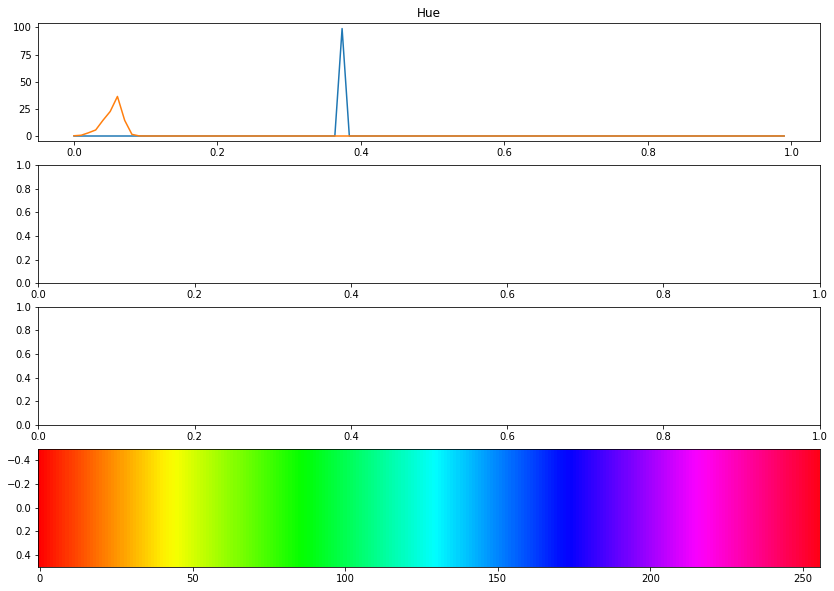

In [77]:
bins = np.linspace(0,1,100)


#not so interesting: Which saturation level is most common? Don't care. Wanna know about saturation of certain hue
#hist_sat_purple = np.histogram(sat_purple[mask_purple],density=True,bins=bins)
#hist_sat_white = np.histogram(sat_white[mask_white],density=True,bins=bins)


hist_hue_purple = np.histogram(hue_purple[mask_purple],density=True,bins=bins)
hist_hue_white = np.histogram(hue_white[mask_white],density=True,bins=bins)

hist_sat_purple = np.histogram(sat_purple[mask_purple],density=True,bins=bins)
hist_sat_white = np.histogram(sat_white[mask_white],density=True,bins=bins)



fig, ax = plt.subplots(4,1,figsize=(14,10))
ax[0].set_title("Hue")
ax[0].plot(bins[:-1],hist_hue_purple[0])
ax[0].plot(bins[:-1],hist_hue_white[0])

ax[1].set_title("Saturation")
ax[1].plot(bins[:-1],hist_sat_purple[0])
ax[1].plot(bins[:-1],hist_sat_white[0])

ax[2].set_title("Hue x Saturation")
ax[2].plot(bins[:-1],hist_sat_purple[0]*hist_hue_purple[0])
ax[2].plot(bins[:-1],hist_sat_white[0]*hist_hue_white[0])

plt.imshow([np.linspace(0, 1, 256)], aspect='auto', cmap=plt.get_cmap("hsv"))